In [6]:
import pandas as pd 
main = pd.read_csv("wiki_data.csv")
main.head()

,Unnamed: 0,text
0,1,Anovo\n\nAnovo (formerly A Novo) is a computer...
1,2,Battery indicator\n\nA battery indicator (also...
2,3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
3,4,CAVNET\n\nCAVNET was a secure military forum w...
4,5,CLidar\n\nThe CLidar is a scientific instrumen...


In [7]:
df = pd.DataFrame(main)
df

,Unnamed: 0,text
0,1,Anovo\n\nAnovo (formerly A Novo) is a computer...
1,2,Battery indicator\n\nA battery indicator (also...
2,3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
3,4,CAVNET\n\nCAVNET was a secure military forum w...
4,5,CLidar\n\nThe CLidar is a scientific instrumen...
...,...,...
10854,10855,Soundcast\n\nSoundcast LLC is a privately fund...
10855,10856,Spectrum analyzer\n\nA spectrum analyzer measu...
10856,10857,Telepresence technology\n\nTelepresence techno...
10857,10858,Trans-Pacific Profiler Network\n\nThe Trans-Pa...


In [8]:
def clean_text(df):
    df["text"] = df["text"].str.lower()
    df["text"] = df["text"].str.replace('[^\w\s]', '')
    df["text"] = df["text"].str.replace('[\d]', '')

In [9]:
clean_text(df)

C:\Users\badie\AppData\Local\Temp\ipykernel_16572\3840562856.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text"] = df["text"].str.replace('[^\w\s]', '')
C:\Users\badie\AppData\Local\Temp\ipykernel_16572\3840562856.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text"] = df["text"].str.replace('[\d]', '')


In [10]:
df

,Unnamed: 0,text
0,1,anovo\n\nanovo formerly a novo is a computer s...
1,2,battery indicator\n\na battery indicator also ...
2,3,bob pease\n\nrobert allen pease august â â ju...
3,4,cavnet\n\ncavnet was a secure military forum w...
4,5,clidar\n\nthe clidar is a scientific instrumen...
...,...,...
10854,10855,soundcast\n\nsoundcast llc is a privately fund...
10855,10856,spectrum analyzer\n\na spectrum analyzer measu...
10856,10857,telepresence technology\n\ntelepresence techno...
10857,10858,transpacific profiler network\n\nthe transpaci...


In [14]:
import nltk 
from nltk.corpus import stopwords

def remove_stopwords(df):
    sw = stopwords.words('english')
    df["text"] = df["text"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [15]:
remove_stopwords(df)
df.head()

,Unnamed: 0,text
0,1,anovo anovo formerly novo computer services co...
1,2,battery indicator battery indicator also known...
2,3,bob pease robert allen pease august â â june a...
3,4,cavnet cavnet secure military forum became ope...
4,5,clidar clidar scientific instrument used measu...


In [17]:
rare = pd.Series(" ".join(df["text"]).split()).value_counts()[-1000:]
rare

hust                1
hkust               1
dimethylpentane     1
trimethylpentane    1
aotules             1
                   ..
scansoft            1
unhooked            1
hauspie             1
lernout             1
dashmounted         1
Length: 1000, dtype: int64

In [18]:
df["text"] = df["text"].apply(lambda x: " ".join(x for x in x.split() if x not in rare))
df.head()

,Unnamed: 0,text
0,1,anovo anovo formerly novo computer services co...
1,2,battery indicator battery indicator also known...
2,3,bob pease robert allen pease august â â june a...
3,4,cavnet cavnet secure military forum became ope...
4,5,clidar clidar scientific instrument used measu...


In [20]:
from textblob import Word, TextBlob
df["text"].apply(lambda x: TextBlob(x).words).head()

0    [anovo, anovo, formerly, novo, computer, servi...
1    [battery, indicator, battery, indicator, also,...
2    [bob, pease, robert, allen, pease, august, â, ...
3    [cavnet, cavnet, secure, military, forum, beca...
4    [clidar, clidar, scientific, instrument, used,...
Name: text, dtype: object

In [21]:
df

,Unnamed: 0,text
0,1,anovo anovo formerly novo computer services co...
1,2,battery indicator battery indicator also known...
2,3,bob pease robert allen pease august â â june a...
3,4,cavnet cavnet secure military forum became ope...
4,5,clidar clidar scientific instrument used measu...
...,...,...
10854,10855,soundcast soundcast llc privately funded compa...
10855,10856,spectrum analyzer spectrum analyzer measures m...
10856,10857,telepresence technology telepresence technolog...
10857,10858,transpacific profiler network transpacific pro...


In [22]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head(50)

,Unnamed: 0,text
0,1,anovo anovo formerly novo computer service com...
1,2,battery indicator battery indicator also known...
2,3,bob pea robert allen pea august â â june analo...
3,4,cavnet cavnet secure military forum became ope...
4,5,clidar clidar scientific instrument used measu...
5,6,capacity loss capacity loss capacity fading ph...
6,7,carbon recycling international carbon recyclin...
7,8,chemical agent resistant coating chemical agen...
8,9,claas cougar claas cougar selfpropelled mower ...
9,10,conductive polymer conductive polymer precisel...


In [24]:
tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns = ["words", "tf"]

tf.sort_values("tf", ascending=False)
tf

,words,tf
0,anovo,2.0
1,service,8201.0
2,company,14600.0
3,rating,559.0
4,giving,564.0
...,...,...
167599,esof,1.0
167600,powertransfer,1.0
167601,rockcrawling,1.0
167602,truggies,1.0


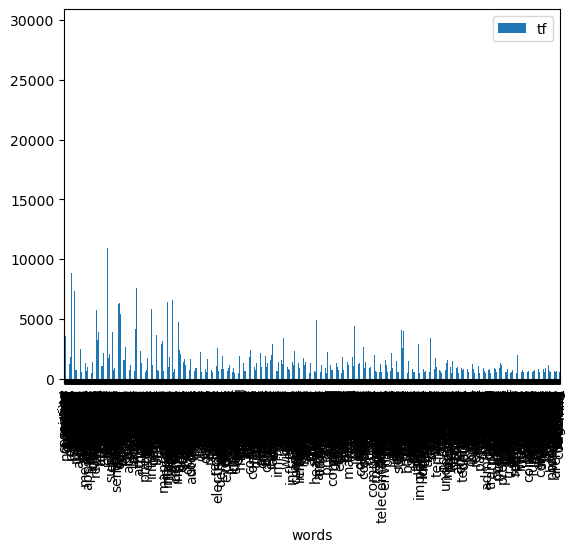

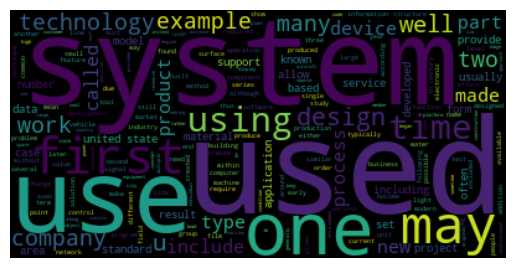

In [30]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()
text = " ".join(i for i in df.text)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
